<a href="https://colab.research.google.com/github/Anirudhakumar/DS-/blob/master/MarketMixModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [24]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#reading the data 
data_frame=pd.read_csv("./drive/My Drive/ConsumerElectronics.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df=data_frame.copy()

In [27]:
#printing some rows of data
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [28]:
#checking data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [29]:
#while changing the gmv column to numeric we can find we have some data where gmv is " "
df[df["gmv"]==" "].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2.408842e+15,2.408842e+15,,1,\N,\N,Prepaid,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4.417909e+15,4.417909e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4.418717e+15,4.418717e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
186,ACCCX3SGDGPZAQXD,2015-10-16 07:30:25,2015,10,4.418158e+15,4.418158e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5


In [30]:
df["gmv"].replace(" ",0,inplace=True)

In [31]:
#we need to change the data type of gmv(Gross Merchandise Value or Revenue) to int as this is of int type
df["gmv"]=pd.to_numeric(df["gmv"])

In [32]:
#checking shape of data
df.shape

(1648824, 20)

In [33]:
#checking for null values in dataset
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

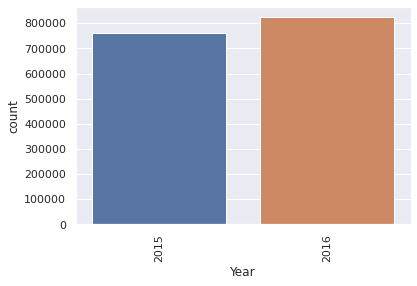

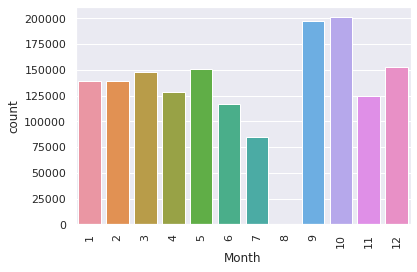

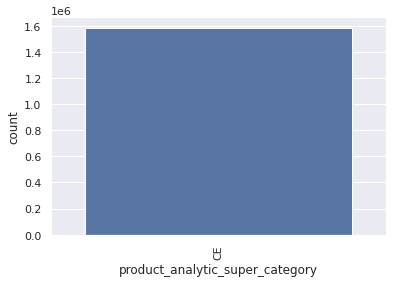

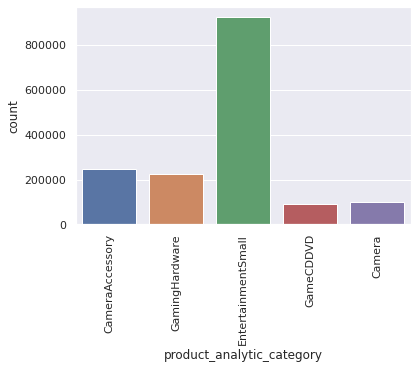

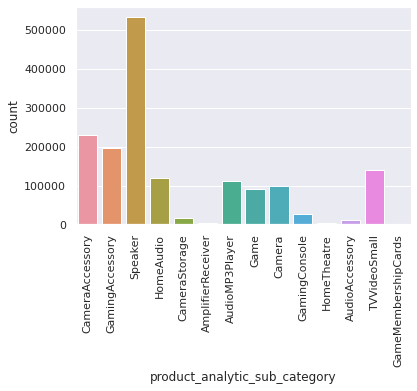

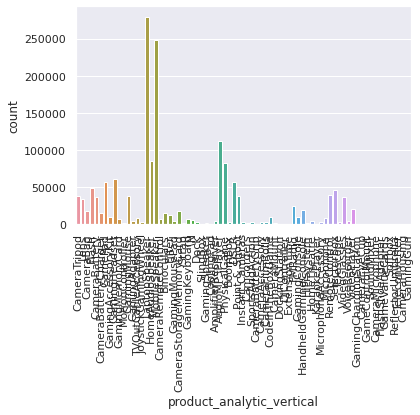

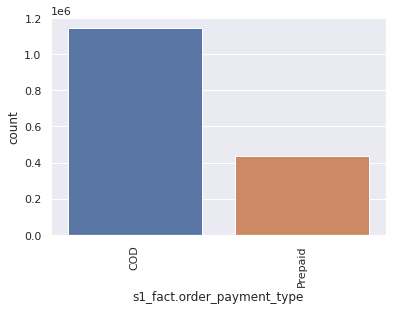

In [46]:
arr=["Year","Month","product_analytic_super_category","product_analytic_category","product_analytic_sub_category","product_analytic_vertical","s1_fact.order_payment_type"]
for i in arr:
  sns.countplot(x=i,data=df)
  plt.xticks(rotation=90)
  plt.show()

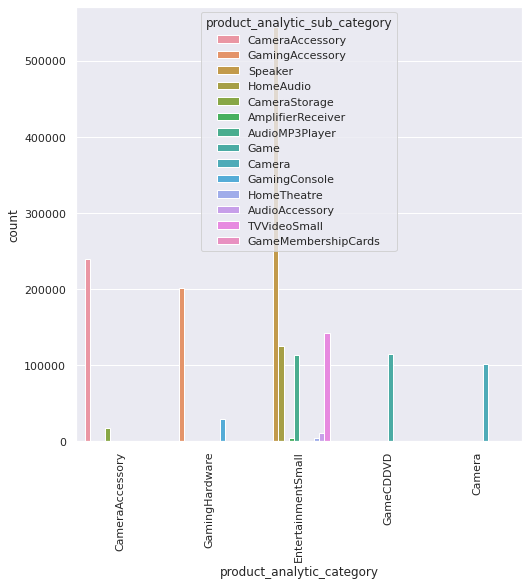

In [35]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_category",hue="product_analytic_sub_category",data=df)
plt.xticks(rotation=90)
plt.show()

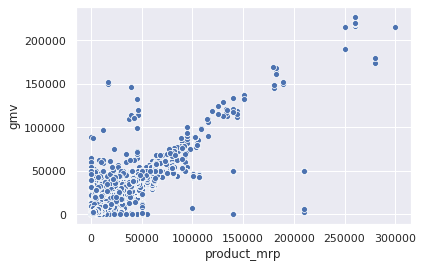

In [36]:
sns.scatterplot(x="product_mrp",y="gmv",data=df)

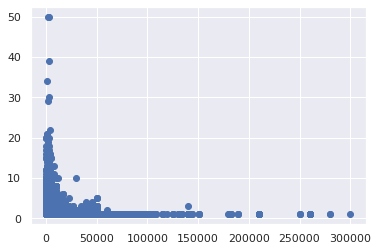

In [37]:
plt.scatter(df["product_mrp"],df["units"])

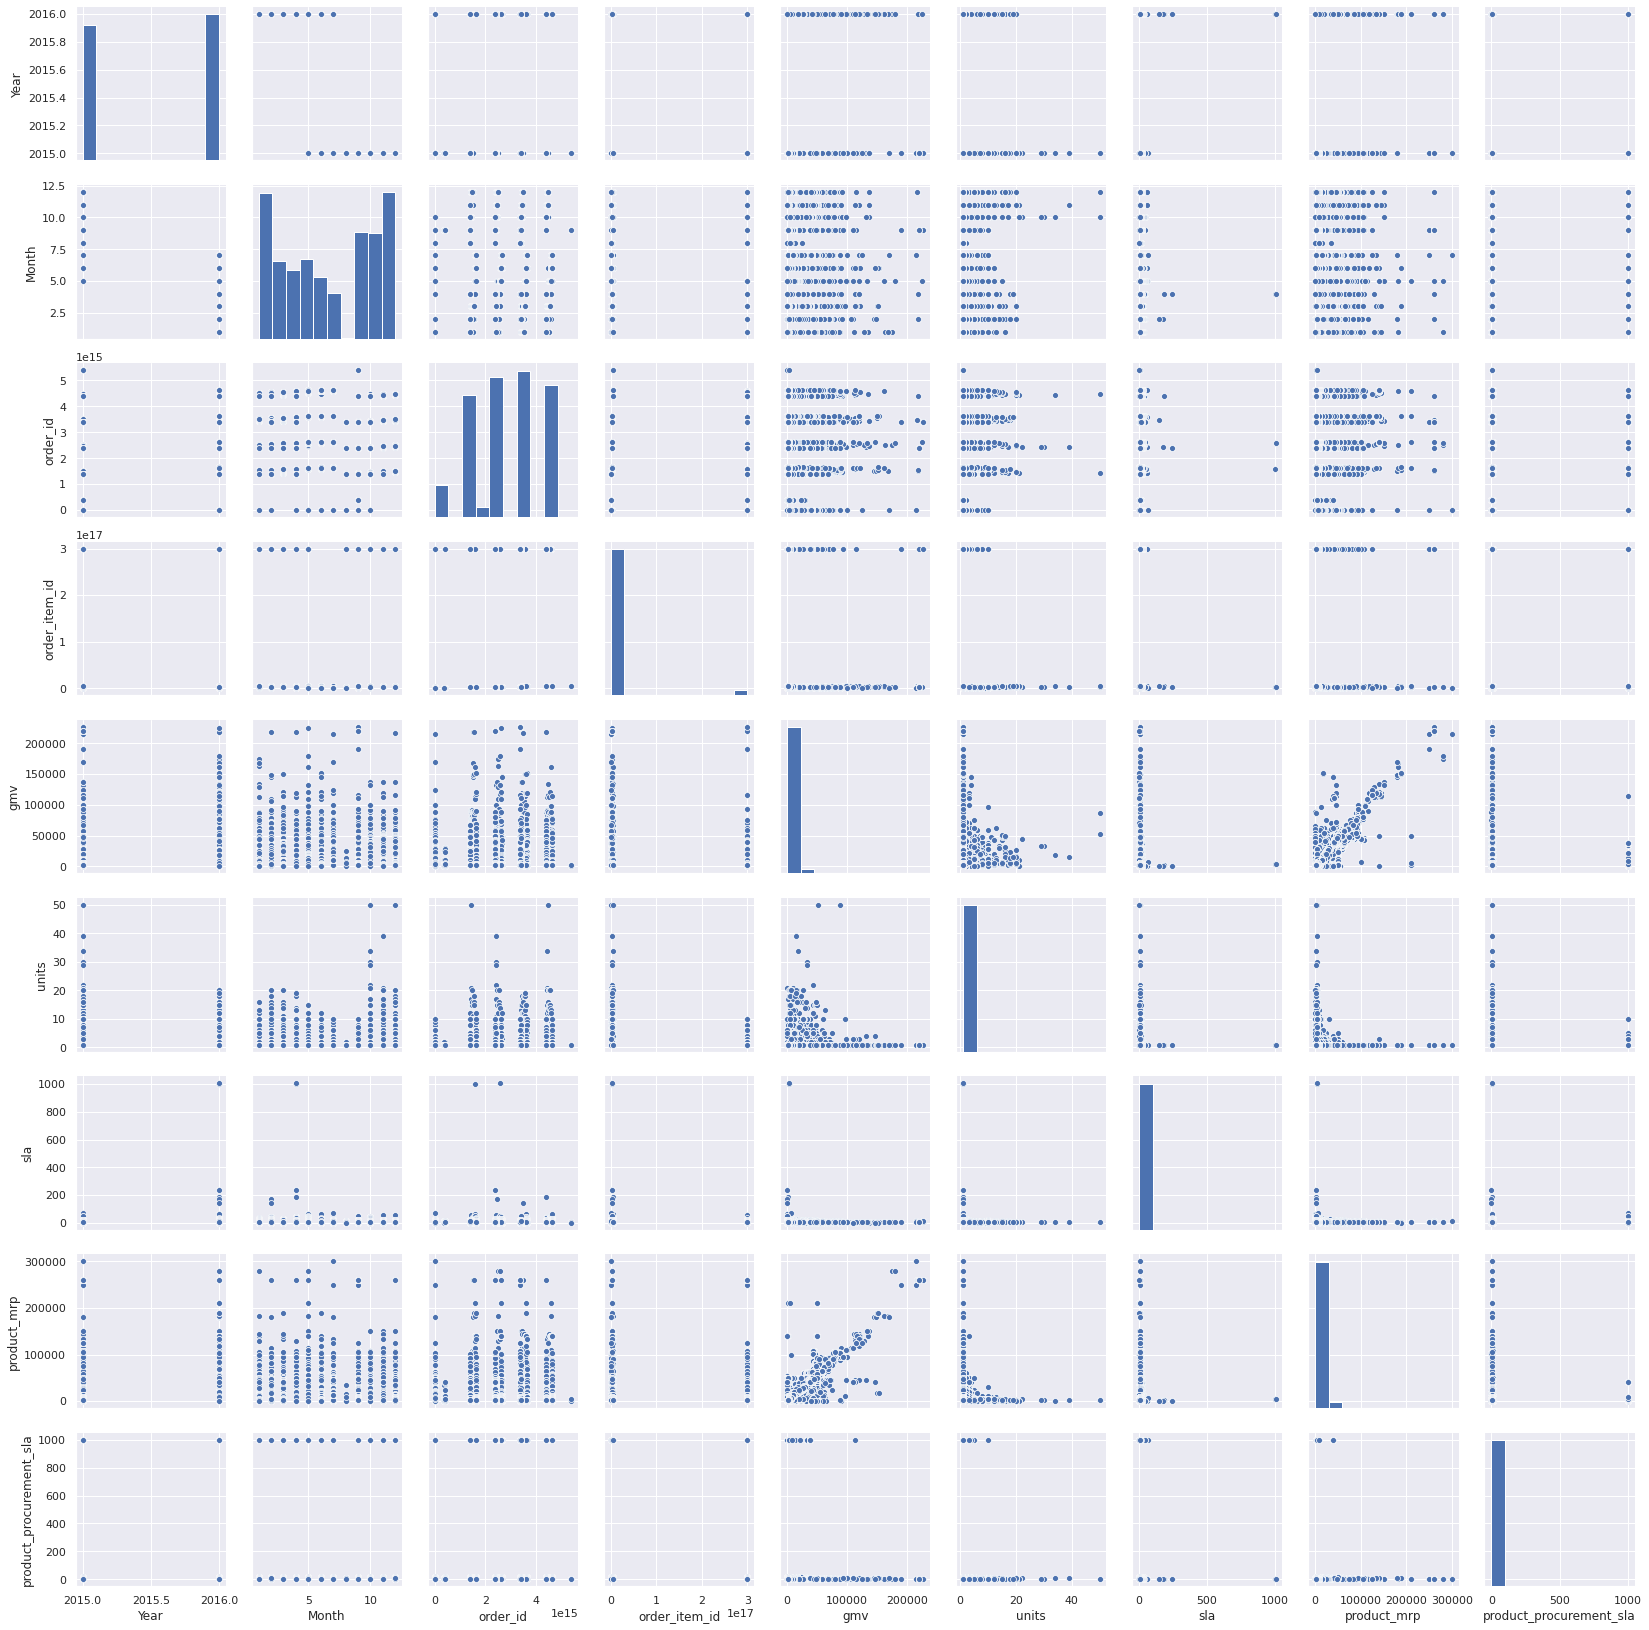

In [20]:
sns.pairplot(df)

In [38]:
df.describe()

,Year,Month,order_id,order_item_id,gmv,units,sla,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,2.453804e+03,1.022087e+00,5.687832e+00,4.108309e+03,5.403451e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,5.612081e+03,2.535318e-01,2.983336e+00,8.510918e+03,5.346618e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,3.390000e+02,1.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,7.490000e+02,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.999000e+03,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03


## Some Checks on Data like mrp should be greater than 0.

In [39]:
#removing rows having price < 0 as we can see in the description the minimum value of price is 0. And this is not correct
df=df[df["product_mrp"]>0]

In [40]:
#gmv(Gross Merchandise Value or Revenue) should be greater than product_mrp * units. So, removing the data which does not satisfy the criteria
df=df[df["gmv"]<df["product_mrp"]*df["units"]]

In [41]:
#printing the shape of data after removing unwanted data
df.shape

(1584430, 20)

In [42]:
#printing the shape of original data 
data_frame.shape

(1648824, 20)

In [44]:
# printing %ge of data loss
round(100*((data_frame.shape[0]-df.shape[0])/data_frame.shape[0]),2)

3.91

So we are loosing only 4 percent of data . And it will not impact our analysis.

### Dividing the data on the basis of product subcategories.

In [47]:
df["product_analytic_sub_category"].value_counts()

Speaker                533305
CameraAccessory        229574
GamingAccessory        196095
TVVideoSmall           140916
HomeAudio              118579
AudioMP3Player         111389
Camera                  99620
Game                    91068
GamingConsole           27616
CameraStorage           17706
AudioAccessory          10304
HomeTheatre              4144
AmplifierReceiver        4017
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [48]:
df_homeaudio=df[df["product_analytic_sub_category"] == "HomeAudio"]

In [49]:
df_CameraAccessory=df[df["product_analytic_sub_category"] == "CameraAccessory"]

In [50]:
df_GamingAccessory=df[df["product_analytic_sub_category"] == "GamingAccessory"]

In [51]:
#printing some data from each of the data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,Prepaid,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,Prepaid,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,Prepaid,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,Prepaid,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,COD,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5


In [52]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [53]:
df_GamingAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075.0,1,\N,\N,COD,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750.0,1,\N,\N,COD,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899.0,1,\N,\N,Prepaid,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,\N,\N,Prepaid,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772.0,1,\N,\N,Prepaid,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5


In [55]:
#printing the shape of all the three data frame
print(df_CameraAccessory.shape)
print(df_GamingAccessory.shape)
print(df_homeaudio.shape)

(229574, 20)
(196095, 20)
(118579, 20)


In [56]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
